회귀
  : 미래의 값을 예측

- 선형회귀
- 릿지
- 다소
- 다항회귀

보스턴 집값 예측

1. 필요한 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

2. 데이터 로드

In [6]:
data = fetch_openml(name='boston', as_frame=True)
df = data.frame
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
pd.DataFrame(data = {
    '컬럼명' : df.columns,
    '설명' : ['1인당 범죄율','주거구역비율','상업지역비율',
            '찰스강과 접한지역여부','일산화질소농도','1가구당 방의개수',
            '1940년이전에 건설된 주택비율','고용센터까지의 거리','방사형 도로 접근지수','재산세율','학생교사비율',
            '흑인거주비율','낮은  사외경제적 지위 인구비율','소유 주택의 중앙값'],
    '데이터타입' : df.dtypes,
    '결측치' : df.isna().sum(),
    '고유값' : df.nunique()
})

,컬럼명,설명,데이터타입,결측치,고유값
CRIM,CRIM,1인당 범죄율,float64,0,504
ZN,ZN,주거구역비율,float64,0,26
INDUS,INDUS,상업지역비율,float64,0,76
CHAS,CHAS,찰스강과 접한지역여부,category,0,2
NOX,NOX,일산화질소농도,float64,0,81
RM,RM,1가구당 방의개수,float64,0,446
AGE,AGE,1940년이전에 건설된 주택비율,float64,0,356
DIS,DIS,고용센터까지의 거리,float64,0,412
RAD,RAD,방사형 도로 접근지수,category,0,9
TAX,TAX,재산세율,float64,0,66


In [19]:
# 카테고리 타입을 정수로 변환
df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] =  df['RAD'].astype(int)

3. 독립변수(x) 와 종속변수(y) 설정

In [20]:
x = df.drop(columns='MEDV')
y = df['MEDV']

4.데이터 분할(학습용과 테스트용)

In [21]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

5.모델 선택

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

6. 예측 / 평가

In [23]:
predict = model.predict(x_test)

In [36]:
predict[-1], np.array(y_test)[-1]

(24.479023639020575, 21.4)

In [38]:
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
mse, r2

(24.291119474973478, 0.6687594935356326)

결정계수
  - 1-SSR/SST
  - SSR : 잔차 제곱합(모델의 예측값과 실제값의 오차 제곱합)
  - SST : 총 변동 제곱합(데이터의 실제값과 평균값 간의 오차 제곱합)
  - R2 = 1  퍼펙트
  - R2 = 0  모델이 데이터를 전혀 설명하지 못함 즉 예측값이 단순 평균동일
  - R2 < 0 모델이 실제 데이터보다 더 나쁜 예측을 함

릿지/라쏘

리지 회귀 : 계수의 제곱값을 패널티로 추가
  - 모든 특성을  사용하지만 특정 특성에 과도하게 의존하지 않도록 만들어 더 안정적인 예측을 가능하게
  - 모든 특성을 사용할때
  - 다중공선성(특성 간 상관관계)문제가 있을때
  - 예측 정확도중요하고.. 결과 해석은 덜 중요할때

라쏘회귀 : 리지와 같다. 다만.. 패널티 계수의 절대값을 사용
  - 일부 계수를 0으로 만든다. 즉 학습에 참여 안한다. 특성중에서 중요하지 않것을 완전히 제거할 수 있다
  - 더 단순하고 해석 가능한 모델을 만든다
  - 특성이 너무많고(100개) 일부만 중요할때 예를들어 10개만 실제로 영향을 미치는경우
  - 특성선택이 필요한경우
  - 해석가능한 모델을 만들고 싶을때
  - 어떤 특성이 중요한지 명확히 보여준다

In [39]:
pd.DataFrame({
    '리지' :['큰 계수를 억제', '모든 특성사용, 계수가 작아짐', '모든 특성이 중요할때'] ,
    '라소' : ['불필요한 특성을 제거','일부특성 제거, 계수가 0이될수 있음','중요한 특성만 남기고 싶을때']
},index=['목적','결과','사용 사례'])

,리지,라소
목적,큰 계수를 억제,불필요한 특성을 제거
결과,"모든 특성사용, 계수가 작아짐","일부특성 제거, 계수가 0이될수 있음"
사용 사례,모든 특성이 중요할때,중요한 특성만 남기고 싶을때


리지와 라소를 같은 데이터로 학습하고 성능을 비교해 보기

In [45]:
# 1 데이터로드
data = fetch_openml(name='boston', as_frame=True)
df = data.frame
# 카테고리 타입을 정수로 변환
df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] =  df['RAD'].astype(int)

# 2 데이터분리(x,y)
x = df.drop(columns='MEDV')
y = df['MEDV']
# 3 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 4 리지회귀
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)  # 규제강도
model_ridge.fit(x_train, y_train) # 학습
predict_rige = model_ridge.predict(x_test) # 예측
# 5 라쏘회귀
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train, y_train)
predict_lasso = model_lasso.predict(x_test)

# 6 결과 비교
mse_ridge = mean_squared_error(y_test, predict_rige)
r2_ridge = r2_score(y_test, predict_rige)
print('mse_ridge : ', mse_ridge)
print('r2_ridge : ', r2_ridge)

mse_lasso = mean_squared_error(y_test, predict_lasso)
r2_lasso = r2_score(y_test, predict_lasso)
print('mse_lasso : ', mse_lasso)
print('r2_lasso : ', r2_lasso)

# 7 리지와 라쏘의 계수 확인
ridge_coefficients = pd.DataFrame({
    '특성' : x.columns,
    '계수' : model_ridge.coef_
})
lasso_coefficients = pd.DataFrame({
    '특성' : x.columns,
    '계수' : model_lasso.coef_
})

mse_ridge :  24.477191227708644
r2_ridge :  0.6662221670168523
mse_lasso :  25.155593753934173
r2_lasso :  0.6569712802223936


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [42]:
ridge_coefficients

,특성,계수
0,CRIM,-0.109234
1,ZN,0.032271
2,INDUS,0.007498
3,CHAS,2.545470
4,NOX,-9.537952
5,RM,4.464505
6,AGE,-0.012191
7,DIS,-1.338700
8,RAD,0.248882
9,TAX,-0.011475


In [43]:
lasso_coefficients

,특성,계수
0,CRIM,-0.104157
1,ZN,0.034893
2,INDUS,-0.016785
3,CHAS,0.919952
4,NOX,-0.000000
5,RM,4.311687
6,AGE,-0.015126
7,DIS,-1.151487
8,RAD,0.239237
9,TAX,-0.012962


포인트
  - 리지 : 모든특성을 사리되, 큰 계수를 억제
  - 라소 : 필요없는 특성은 과감히 제거

- 규제강도(alph)에다라서 결과가 달라 이 값들을 적절히 조정해서 최사의 조합을 찾는다. --> 하이퍼 파라메터 튜닝

다항회귀 : 다항... 다차원  y = ax2 + bx + c
 - 선형모델은 1차원 방정식 즉.. 특성을 다항식으로 변환
 - 다항회귀는 선형모델 , 데이터를 비선형 공간으로 변환한뒤 선형 모델적용
 - 언제사용 : 데이터와 목표값 사이에 비선형적일때

In [46]:
# 1 데이터로드
data = fetch_openml(name='boston', as_frame=True)
df = data.frame
# 카테고리 타입을 정수로 변환
df['CHAS'] = df['CHAS'].astype(int)
df['RAD'] =  df['RAD'].astype(int)

# 2 데이터분리(x,y)
x = df.drop(columns='MEDV')
y = df['MEDV']
# 3 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4 선형의 데이터를 다항형태로 변환 라이브러리
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [49]:
x_train.shape, x_train_poly.shape

((404, 13), (404, 105))

선형회귀로 학습

In [50]:
model = LinearRegression()
model.fit(x_train_poly, y_train)
predict = model.predict(x_test_poly)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
mse, r2

(14.566436059193718, 0.8013679994205611)

방(RM)의 계수와 집값(MEDV)사이의 관계

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


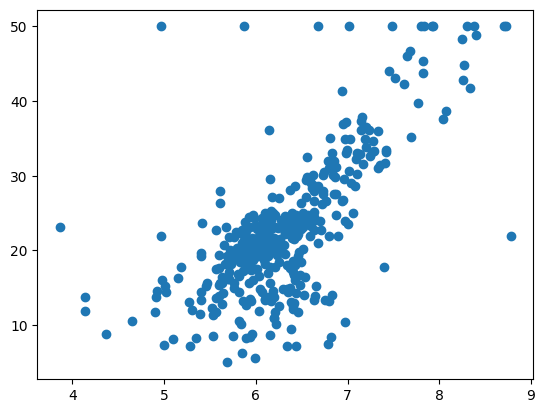

In [51]:
data = fetch_openml(name='boston', as_frame=True)
df = data.frame
x = df[['RM']]
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# 시각화
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

In [52]:
model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
mse, r2

(46.144775347317264, 0.3707569232254778)

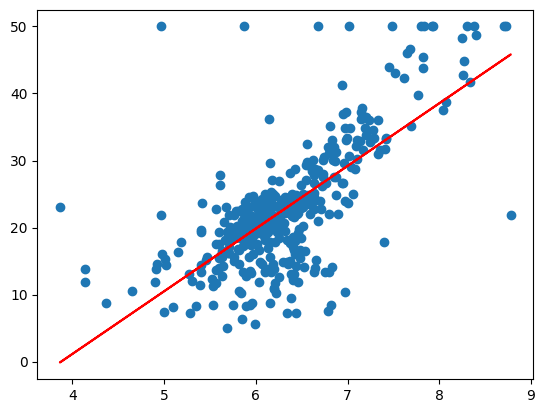

In [53]:
# 시각화
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='red')
plt.show()

In [65]:
# 비선형
data = fetch_openml(name='boston', as_frame=True)
df = data.frame
x = df[['RM']]
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train과 y_train을 같이 정렬
x_train = x_train.sort_values('RM')
y_train = y_train[x_train.index]

x_test = x_test.sort_values('RM')
y_test = y_test[x_test.index]


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)


x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
predict = model.predict(x_test_poly)
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
mse, r2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


(39.5779932843139, 0.4603034020788461)

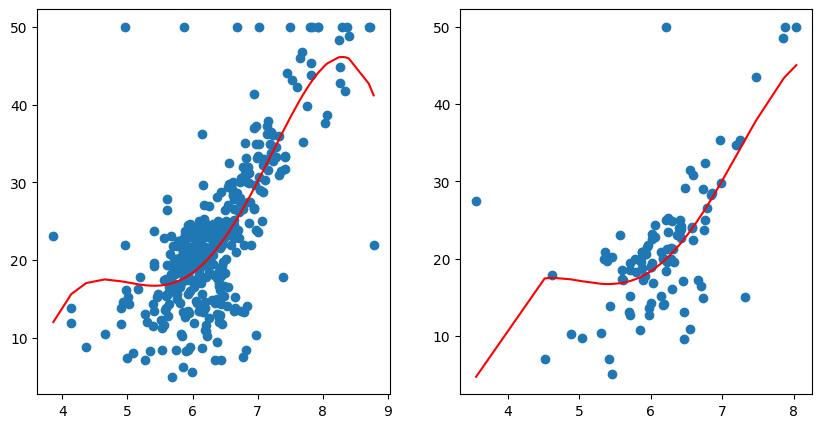

In [68]:
# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train_poly), color='red')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test_poly), color='red')

plt.show()